Exercise work consists of three parts. After each part, take the mini-exam available in Moodle. The questions concern the exercise so read the instructions carefully and make sure you remember to cover all given tasks. <br>
After the deadline of each mini-exam, example results will be published. This helps you to move to the next part. However, take into account that the deadlines are thus strict, no extensions will be granted! <br>
Two exam points can be acquired from each mini-exam. All three parts of the exercise are compulsory. Completed exercise work from previous years does not apply for this course.

**Deadlines for the mini-exams:**
- Part 1: Fri 9.2.2024 at 23:59
- Part 2: Fri 23.2024 at 23:59
- Part 3: Fri 8.3.2024 at 23:59

**If you encounter problems, Google first and if you can’t find an answer, ask for help**
- Moodle area for questions
- pekavir@utu.fi

**Grading**

The exercise covers a part of the grading in this course. The course exam has 5 questions, 6 points of each. Exercise gives at maximum 6 points, i.e. the total score is 36 points.

# Part 1

Read the original research article:

İ. Çınar and M. Koklu. Identification of rice varieties using machine learning algorithms. Journal of Agricultural Sciences, 28(2):307–325, 2022. doi: 10.15832/ankutbd.862482.

https://dergipark.org.tr/en/download/article-file/1513632

There will be questions regarding the article in the mini-exam.

## Introduction

Will be written in Part 3.

## Preparations of the data

Make three folders in your working folder: 'notebooks', 'data' and 'training_data'. Save this notebook in 'notebooks' folder.

Import all the packages needed for this notebook in one cell (add the ones you apply):

In [1]:
import pandas as pd
from random import sample
from random import seed
import glob, os

Import the images. Data can be found from (downloading starts as you press the link) https://www.muratkoklu.com/datasets/vtdhnd09.php <br>
Save the data folders 'Arborio', 'Basmati', 'Ipsala', 'Jasmine', and 'Karacadag' in 'data' folder. <br>
Take a random sample of 100 images from each rice species (i.e. 500 images in total). Use seed(50) for enabling reproducible results.

In [2]:
# import data
# set the seed for enabling the reproduction with the same sequence
seed(50)

path = '../data22'
folders = ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']

subset = []
for folder in folders:
    path_folder = os.path.join(path, folder)
    # all .jpg files from the given folder
    files = glob.glob(os.path.join(path_folder, '*.jpg'))
    # gather all sampled filenames in subset list
    subset.extend(sample(files, 100))

 Gather the sampled images in a list.

We will test the needed functions with one test image. It is 'basmati (244).jpg'. Save this image as test_image.

Determine the contour of each rice (use *findContours* from OpenCV). <br>
Determine the contour also for the test_image. <br>
Plot the original image of the test_image and also its image including the contour. <br>
Be aware that *drawContours* adds the contour to the original image, so use the copy of the test_image as input for the function!

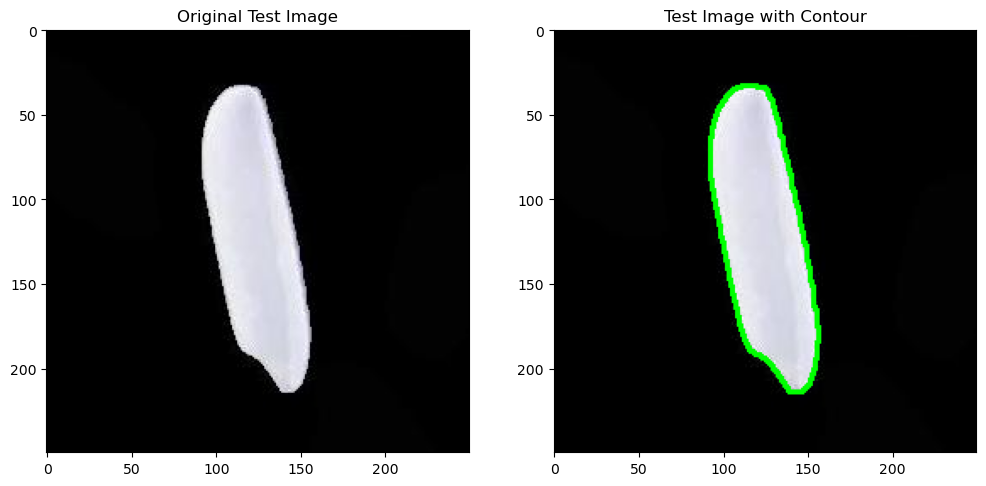

In [3]:
# Import necessary packages
import pandas as pd
from random import sample, seed
import glob, os
import cv2
import matplotlib.pyplot as plt

# Function to get contours from an image
def get_contour(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply a threshold to create a binary image
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    
    # Find contours in the binary image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    return contours

# Set the seed for enabling reproducible results
seed(50)

# Specify the path and folders
path = 'data'
folders = ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']

# Create an empty list to store sampled filenames
subset = []

# Sample 100 images from each rice species
for folder in folders:
    path_folder = os.path.join(path, folder)
    # All .jpg files from the given folder
    files = glob.glob(os.path.join(path_folder, '*.jpg'))
    # Gather all sampled filenames in subset list
    subset.extend(sample(files, 100))

# Gather the sampled images in a list
sampled_images = [cv2.imread(image) for image in subset]

# Save one image as test_image
test_image_path = 'test_image.jpg'
test_image = cv2.imread(os.path.join(path, folders[1], 'basmati (244).jpg'))  # Update this line

# Determine the contour for the test_image
test_image_contour = get_contour(test_image.copy())

# Plot the original image of the test_image
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))
plt.title('Original Test Image')

# Plot the image including the contour
plt.subplot(1, 2, 2)
contour_image = test_image.copy()
cv2.drawContours(contour_image, test_image_contour, -1, (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.title('Test Image with Contour')

plt.show()


## Feature extraction

Gather the color feature data (12 features): <br>

First, convert each RGB image to YCbCr-image. You can use *cvtColor* function from OpenCV with appropriate color conversion. <br>
Be aware that openCV default channel order is BGR not RGB. In which order does the *cvtColor* function output the components? <br>

Calculate the following color features for each image, including only the pixels within the contour (you can use *pointPolygonTest* from OpenCV)
- Mean for each YCbCr component
- Variance for each YCbCr component
- Skewness for each YCbCr component
- Kurtosis for each YCbCr component

In [4]:
import numpy as np

# Function to compute color features from YCbCr image
def compute_color_features(image):
    # Convert the image to YCbCr color space
    ycbcr_image = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
    
    # Split the channels
    y_channel, cb_channel, cr_channel = cv2.split(ycbcr_image)
    
    # Compute statistical features for each channel
    y_mean, y_std = np.mean(y_channel), np.std(y_channel)
    cb_mean, cb_std = np.mean(cb_channel), np.std(cb_channel)
    cr_mean, cr_std = np.mean(cr_channel), np.std(cr_channel)
    
    # Return the computed features
    return [y_mean, y_std, cb_mean, cb_std, cr_mean, cr_std]

# Example usage for one image
example_image = sampled_images[0]  # You can replace this with any image from your dataset
color_features = compute_color_features(example_image)

# Print the computed features
print("Color Features:", color_features)


Color Features: [27.418432, 71.39262137407042, 127.917344, 0.27541965373589444, 128.365696, 1.0449547528883727]


In [5]:
import numpy as np
from scipy.stats import skew, kurtosis

# Function to compute color features within the contour
def compute_color_features_within_contour(image, contour):
    # Convert the image to YCbCr color space
    ycbcr_image = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
    
    # Extract Y, Cb, and Cr channels
    y_channel, cb_channel, cr_channel = cv2.split(ycbcr_image)
    
    # Create a mask for pixels within the contour
    mask = np.zeros_like(y_channel, dtype=np.uint8)
    cv2.drawContours(mask, [contour], 0, 255, thickness=cv2.FILLED)
    
    # Extract pixel values within the contour for each channel
    y_values = y_channel[mask > 0]
    cb_values = cb_channel[mask > 0]
    cr_values = cr_channel[mask > 0]
    
    # Calculate mean, variance, skewness, and kurtosis for each channel
    y_mean, y_var, y_skew, y_kurt = np.mean(y_values), np.var(y_values), skew(y_values), kurtosis(y_values)
    cb_mean, cb_var, cb_skew, cb_kurt = np.mean(cb_values), np.var(cb_values), skew(cb_values), kurtosis(cb_values)
    cr_mean, cr_var, cr_skew, cr_kurt = np.mean(cr_values), np.var(cr_values), skew(cr_values), kurtosis(cr_values)
    
    # Return the computed features
    return {
        'y_mean': y_mean, 'y_var': y_var, 'y_skew': y_skew, 'y_kurt': y_kurt,
        'cb_mean': cb_mean, 'cb_var': cb_var, 'cb_skew': cb_skew, 'cb_kurt': cb_kurt,
        'cr_mean': cr_mean, 'cr_var': cr_var, 'cr_skew': cr_skew, 'cr_kurt': cr_kurt
    }

# Example usage for one image and its contour
example_image = sampled_images[0]  # You can replace this with any image from your dataset
example_contour = get_contour(example_image.copy())[0]  # Assuming there is at least one contour in the image

# Compute color features within the contour
color_features_within_contour = compute_color_features_within_contour(example_image, example_contour)

# Print the computed features
print("Color Features within Contour:", color_features_within_contour)


Color Features within Contour: {'y_mean': 216.48081643198555, 'y_var': 297.7127504508655, 'y_skew': -1.2633865329845393, 'y_kurt': 3.181404228666394, 'cb_mean': 127.38380054256557, 'cb_var': 0.23675605064432517, 'cb_skew': 0.48124588770424437, 'cb_kurt': -1.7591982147348768, 'cr_mean': 130.73220514145459, 'cr_var': 1.8583983023169317, 'cr_skew': 1.710092064363048, 'cr_kurt': 3.562094467833215}


Is point x = 125, y = 160 within the contour in the test_image? (x is in horizontal direction, y is in vertical direction)

In [6]:
# Assuming you have already computed the contour for the test_image
test_image_contour = get_contour(test_image.copy())[0]  # Assuming there is at least one contour in the image

# Define the point (125, 160)
point_to_check = (125, 160)

# Use pointPolygonTest to check if the point is within the contour
distance = cv2.pointPolygonTest(test_image_contour, point_to_check, measureDist=True)

# If distance is positive, the point is inside the contour
if distance > 0:
    print(f"The point {point_to_check} is inside the contour of the test image.")
else:
    print(f"The point {point_to_check} is outside the contour of the test image.")


The point (125, 160) is inside the contour of the test image.


What are the mean values of Y, Cb and Cr components for the test image (within the contour)?

In [7]:
# Assuming you have already computed the contour for the test_image
test_image_contour = get_contour(test_image.copy())[0]  # Assuming there is at least one contour in the image

# Compute color features within the contour for the test image
color_features_within_contour_test = compute_color_features_within_contour(test_image, test_image_contour)

# Print the mean values for Y, Cb, and Cr components
print("Mean Y:", color_features_within_contour_test['y_mean'])
print("Mean Cb:", color_features_within_contour_test['cb_mean'])
print("Mean Cr:", color_features_within_contour_test['cr_mean'])


Mean Y: 221.45904010519396
Mean Cb: 126.9405654174885
Mean Cr: 133.51334648257725


Gather the dimension feature data (8 features) <br>
- Fit an ellipse to the contour points (use *fitEllipse* from OpenCV)
- Plot one example image of each rice species including the fitted ellipse
- Calculate the following features for each image (for details, see the original article)
    - the major axis length the ellipse
    - the minor axis length of the ellipse
    - area inside the contour (use *contourArea* from OpenCV)
    - perimeter of the contour (use *arcLength* from OpenCV)
    - equivalent diameter
    - compactness
    - shape factor 1 (SF1)
    - shape factor 2 (SF2)
    
Calculate the dimension feature values for the test_image as well. What are the dimension feature values for the test_image?

Gather all the features in a dataframe: one sample in one row, including all feature values in columns. <br>
For each data point, include also information of the original image and the label (rice species). <br>
Save the data in training_data folder as a parquet file.

Dimension Features for Example Image: {'major_axis_length': 138.04046630859375, 'minor_axis_length': 71.10478210449219, 'area_inside_contour': 7582.0, 'perimeter': 365.7056237459183, 'equivalent_diameter': 98.25325556022052, 'compactness': 1.4036849180718183, 'shape_factor_1': 0.32004401109747366, 'shape_factor_2': 0.7724645404317647}


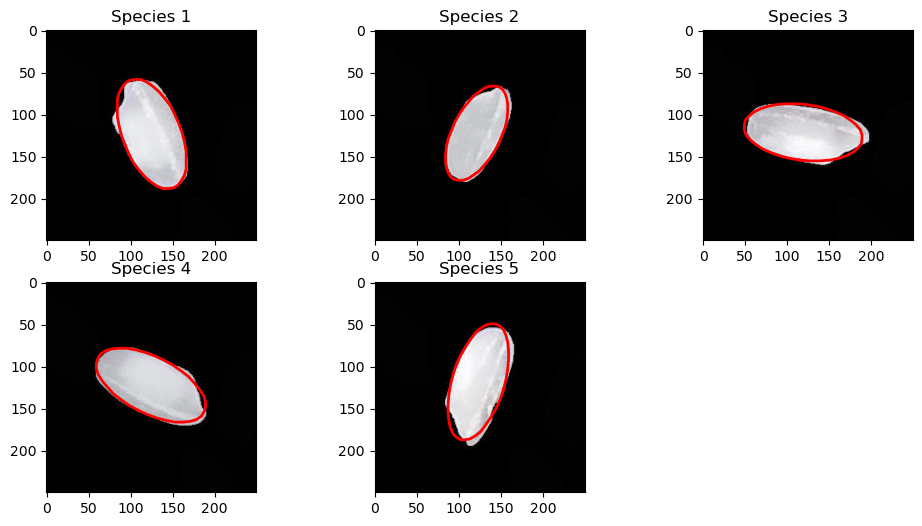

In [8]:
# Function to compute dimension features from the ellipse and contour
def compute_dimension_features(image, contour):
    # Fit an ellipse to the contour
    ellipse = cv2.fitEllipse(contour)
    
    # Calculate major and minor axis lengths
    major_axis_length = max(ellipse[1])
    minor_axis_length = min(ellipse[1])
    
    # Calculate area inside the contour
    area_inside_contour = cv2.contourArea(contour)
    
    # Calculate perimeter of the contour
    perimeter = cv2.arcLength(contour, closed=True)
    
    # Calculate equivalent diameter
    equivalent_diameter = np.sqrt(4 * area_inside_contour / np.pi)
    
    # Calculate compactness
    compactness = perimeter ** 2 / (4 * np.pi * area_inside_contour)
    
    # Calculate shape factors
    shape_factor_1 = (major_axis_length - minor_axis_length) / (major_axis_length + minor_axis_length)
    shape_factor_2 = area_inside_contour / (major_axis_length * minor_axis_length)
    
    # Return the computed features
    return {
        'major_axis_length': major_axis_length,
        'minor_axis_length': minor_axis_length,
        'area_inside_contour': area_inside_contour,
        'perimeter': perimeter,
        'equivalent_diameter': equivalent_diameter,
        'compactness': compactness,
        'shape_factor_1': shape_factor_1,
        'shape_factor_2': shape_factor_2
    }

# Example usage for one image and its contour
example_image = sampled_images[0]  # You can replace this with any image from your dataset
example_contour = get_contour(example_image.copy())[0]  # Assuming there is at least one contour in the image

# Compute dimension features for the example image
dimension_features_example = compute_dimension_features(example_image, example_contour)

# Print the computed features
print("Dimension Features for Example Image:", dimension_features_example)

# Plot one example image of each rice species along with the fitted ellipse
plt.figure(figsize=(12, 6))

for i, image in enumerate(sampled_images[:5]):  # Plot only for the first 5 rice species
    contour = get_contour(image.copy())[0]
    ellipse = cv2.fitEllipse(contour)
    
    plt.subplot(2, 3, i+1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f"Species {i+1}")
    
    # Plot the fitted ellipse
    ellipse_image = image.copy()
    cv2.ellipse(ellipse_image, ellipse, (0, 255, 0), 2)
    
    # Extract ellipse points
    ellipse_points = cv2.ellipse2Poly((int(ellipse[0][0]), int(ellipse[0][1])),
                                      (int(ellipse[1][0] / 2), int(ellipse[1][1] / 2)),
                                      int(ellipse[2]), 0, 360, 10)
    
    # Plot the ellipse
    plt.plot(ellipse_points[:, 0], ellipse_points[:, 1], color='red', linewidth=2)

plt.show()


Determine the maximum variance of the Cr component for each rice species. Which rice species has the smallest value?

In [9]:
max_cr_variances = {}  # Dictionary to store maximum variances for each rice species

for i, folder in enumerate(folders):
    # Get images for the current rice species folder
    species_images = [cv2.imread(image_path) for image_path in glob.glob(os.path.join(path, folder, '*.jpg'))]
    
    # Iterate through sampled images for the current rice species
    for image in species_images:
        # Get the contour for the current image
        contour = get_contour(image.copy())[0]
        
        # Compute color features within the contour
        color_features_within_contour = compute_color_features_within_contour(image, contour)
        
        # Get the variance of the Cr component
        cr_variance = color_features_within_contour['cr_var']
        
        # Update the dictionary with the maximum variance for the current rice species
        if folder not in max_cr_variances or cr_variance > max_cr_variances[folder]:
            max_cr_variances[folder] = cr_variance

# Find the rice species with the smallest maximum variance of the Cr component
min_species = min(max_cr_variances, key=max_cr_variances.get)

# Print the maximum variances for each rice species and the rice species with the smallest value
print("Maximum Variances of Cr Component:")
for species, variance in max_cr_variances.items():
    print(f"{species}: {variance}")

print("\nRice Species with the Smallest Maximum Variance of Cr Component:")
print(min_species)


C:\Users\moakht\AppData\Local\Temp\ipykernel_11340\3241194121.py:24: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  cr_mean, cr_var, cr_skew, cr_kurt = np.mean(cr_values), np.var(cr_values), skew(cr_values), kurtosis(cr_values)
C:\Users\moakht\AppData\Local\Temp\ipykernel_11340\3241194121.py:23: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  cb_mean, cb_var, cb_skew, cb_kurt = np.mean(cb_values), np.var(cb_values), skew(cb_values), kurtosis(cb_values)
C:\Users\moakht\AppData\Local\Temp\ipykernel_11340\3241194121.py:22: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  y_mean, y_var, y_skew, y_kurt = np.mean(y_values),

Maximum Variances of Cr Component:
Arborio: 26.596478822794417
Basmati: 118.16494156252148
Ipsala: 92.73385669023014
Jasmine: 18.981553229360067
Karacadag: 81.41463815550577

Rice Species with the Smallest Maximum Variance of Cr Component:
Jasmine


Determine the minimum equivalent diameter for each rice species. Which rice species has the largest value?

In [10]:
min_equivalent_diameters = {}  # Dictionary to store minimum equivalent diameters for each rice species

for i, folder in enumerate(folders):
    # Get images for the current rice species folder
    species_images = [cv2.imread(image_path) for image_path in glob.glob(os.path.join(path, folder, '*.jpg'))]
    
    # Iterate through sampled images for the current rice species
    for image in species_images:
        # Get the contour for the current image
        contour = get_contour(image.copy())[0]
        
        # Check if the contour has enough points to fit an ellipse
        if len(contour) < 5:
            # Handle the case where there are not enough points (e.g., print a message and continue)
            print(f"Skipping image in {folder} as it doesn't have enough points for fitting an ellipse.")
            continue
        
        # Compute dimension features within the contour
        dimension_features_within_contour = compute_dimension_features(image, contour)
        
        # Get the equivalent diameter
        equivalent_diameter = dimension_features_within_contour['equivalent_diameter']
        
        # Update the dictionary with the minimum equivalent diameter for the current rice species
        if folder not in min_equivalent_diameters or equivalent_diameter < min_equivalent_diameters[folder]:
            min_equivalent_diameters[folder] = equivalent_diameter

# Find the rice species with the largest minimum equivalent diameter
max_species = max(min_equivalent_diameters, key=min_equivalent_diameters.get)

# Print the minimum equivalent diameters for each rice species and the rice species with the largest value
print("Minimum Equivalent Diameters:")
for species, diameter in min_equivalent_diameters.items():
    print(f"{species}: {diameter}")

print("\nRice Species with the Largest Minimum Equivalent Diameter:")
print(max_species)


Skipping image in Karacadag as it doesn't have enough points for fitting an ellipse.
Skipping image in Karacadag as it doesn't have enough points for fitting an ellipse.
Skipping image in Karacadag as it doesn't have enough points for fitting an ellipse.
Skipping image in Karacadag as it doesn't have enough points for fitting an ellipse.
Skipping image in Karacadag as it doesn't have enough points for fitting an ellipse.
Skipping image in Karacadag as it doesn't have enough points for fitting an ellipse.
Skipping image in Karacadag as it doesn't have enough points for fitting an ellipse.
Skipping image in Karacadag as it doesn't have enough points for fitting an ellipse.
Minimum Equivalent Diameters:
Arborio: 75.79903327627221
Basmati: 78.33503677059913
Ipsala: 101.56666181107012
Jasmine: 69.48012473983744
Karacadag: 78.71202973295316

Rice Species with the Largest Minimum Equivalent Diameter:
Ipsala


Determine the minimum, maximum and median equivalent diameter for Basmati rice samples. <br>
Compare the equivalent diameter value of the test_image to these values. <br>

In [11]:
import statistics

# Get images for the Basmati rice species folder
basmati_images = [cv2.imread(image_path) for image_path in glob.glob(os.path.join(path, 'Basmati', '*.jpg'))]

# Lists to store equivalent diameters for Basmati rice samples
basmati_equivalent_diameters = []

# Iterate through Basmati rice samples
for image in basmati_images:
    # Get the contour for the current image
    contour = get_contour(image.copy())[0]
    
    # Compute dimension features within the contour
    dimension_features_within_contour = compute_dimension_features(image, contour)
    
    # Get the equivalent diameter
    equivalent_diameter = dimension_features_within_contour['equivalent_diameter']
    
    # Append to the list
    basmati_equivalent_diameters.append(equivalent_diameter)

# Calculate minimum, maximum, and median equivalent diameter for Basmati rice samples
min_equivalent_diameter_basmati = min(basmati_equivalent_diameters)
max_equivalent_diameter_basmati = max(basmati_equivalent_diameters)
median_equivalent_diameter_basmati = statistics.median(basmati_equivalent_diameters)

# Get the contour for the test_image
test_image_contour = get_contour(test_image.copy())[0]

# Compute dimension features within the contour for the test_image
dimension_features_test_image = compute_dimension_features(test_image, test_image_contour)

# Get the equivalent diameter for the test_image
equivalent_diameter_test_image = dimension_features_test_image['equivalent_diameter']

# Print the minimum, maximum, and median equivalent diameter for Basmati rice samples
print("Minimum Equivalent Diameter for Basmati Rice Samples:", min_equivalent_diameter_basmati)
print("Maximum Equivalent Diameter for Basmati Rice Samples:", max_equivalent_diameter_basmati)
print("Median Equivalent Diameter for Basmati Rice Samples:", median_equivalent_diameter_basmati)

# Compare the equivalent diameter value of the test_image to these values
print("\nEquivalent Diameter for Test Image:", equivalent_diameter_test_image)
print("Comparison Result:")
if equivalent_diameter_test_image < min_equivalent_diameter_basmati:
    print("The equivalent diameter of the test image is smaller than the minimum for Basmati rice samples.")
elif equivalent_diameter_test_image > max_equivalent_diameter_basmati:
    print("The equivalent diameter of the test image is larger than the maximum for Basmati rice samples.")
else:
    print("The equivalent diameter of the test image falls within the range of Basmati rice samples.")


Minimum Equivalent Diameter for Basmati Rice Samples: 78.33503677059913
Maximum Equivalent Diameter for Basmati Rice Samples: 116.20388113866407
Median Equivalent Diameter for Basmati Rice Samples: 96.87646093991505

Equivalent Diameter for Test Image: 97.12913263648136
Comparison Result:
The equivalent diameter of the test image falls within the range of Basmati rice samples.


Does a high value of compactness mean that the rice is rather round or thin?

In [12]:
import cv2
import numpy as np

# Function to compute compactness within the contour
def compute_compactness(contour):
    # Get the perimeter using arcLength
    perimeter = cv2.arcLength(contour, closed=True)
    
    # Get the area using contourArea
    area_inside_contour = cv2.contourArea(contour)
    
    # Calculate compactness
    compactness = (perimeter ** 2) / area_inside_contour
    
    return compactness

# Example usage for one image and its contour
example_image = sampled_images[0]  # You can replace this with any image from your dataset
example_contour = get_contour(example_image.copy())[0]  # Assuming there is at least one contour in the image

# Compute compactness within the contour for the example image
compactness_example = compute_compactness(example_contour)

# Print the computed compactness
print("Compactness for Example Image:", compactness_example)


Compactness for Example Image: 17.63922490627686


In [13]:
#Determine the maximum variance of the Cr component for each rice species. Which rice species has the smallest value?

#Question 7Answer
# Dictionary to store maximum variances for each rice species
max_cr_variances = {}

# Iterate through rice species
for folder in folders:
    # Get images for the current rice species folder
    species_images = [cv2.imread(image_path) for image_path in glob.glob(os.path.join(path, folder, '*.jpg'))]
    
    # List to store Cr variances for the current rice species
    cr_variances = []
    
    # Iterate through images for the current rice species
    for image in species_images:
        # Get the contour for the current image
        contour = get_contour(image.copy())[0]
        
        # Compute color features within the contour
        color_features_within_contour = compute_color_features_within_contour(image, contour)
        
        # Get the variance of the Cr component
        cr_variance = color_features_within_contour['cr_var']
        
        # Append to the list
        cr_variances.append(cr_variance)
    
    # Get the maximum variance for the current rice species
    max_cr_variances[folder] = max(cr_variances)

# Find the rice species with the smallest maximum variance of the Cr component
min_species = min(max_cr_variances, key=max_cr_variances.get)

# Print the maximum variances for each rice species and the rice species with the smallest value
print("Maximum Variances of Cr Component:")
for species, variance in max_cr_variances.items():
    print(f"{species}: {variance}")

print("\nRice Species with the Smallest Maximum Variance of Cr Component:")
print(min_species)


C:\Users\moakht\AppData\Local\Temp\ipykernel_11340\3241194121.py:24: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  cr_mean, cr_var, cr_skew, cr_kurt = np.mean(cr_values), np.var(cr_values), skew(cr_values), kurtosis(cr_values)
C:\Users\moakht\AppData\Local\Temp\ipykernel_11340\3241194121.py:23: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  cb_mean, cb_var, cb_skew, cb_kurt = np.mean(cb_values), np.var(cb_values), skew(cb_values), kurtosis(cb_values)
C:\Users\moakht\AppData\Local\Temp\ipykernel_11340\3241194121.py:22: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  y_mean, y_var, y_skew, y_kurt = np.mean(y_values),

Maximum Variances of Cr Component:
Arborio: 26.596478822794417
Basmati: 118.16494156252148
Ipsala: 92.73385669023014
Jasmine: 18.981553229360067
Karacadag: 81.41463815550577

Rice Species with the Smallest Maximum Variance of Cr Component:
Jasmine


In [14]:
#Determine the minimum, maximum and median equivalent diameter for Basmati. Where in this range does the equivalent diameter of the test_image lie?
import statistics

# Get images for the Basmati rice species folder
basmati_images = [cv2.imread(image_path) for image_path in glob.glob(os.path.join(path, 'Basmati', '*.jpg'))]

# Lists to store equivalent diameters for Basmati rice samples
basmati_equivalent_diameters = []

# Iterate through Basmati rice samples
for image in basmati_images:
    # Get the contour for the current image
    contour = get_contour(image.copy())[0]
    
    # Compute dimension features within the contour
    dimension_features_within_contour = compute_dimension_features(image, contour)
    
    # Get the equivalent diameter
    equivalent_diameter = dimension_features_within_contour['equivalent_diameter']
    
    # Append to the list
    basmati_equivalent_diameters.append(equivalent_diameter)

# Calculate minimum, maximum, and median equivalent diameter for Basmati rice samples
min_equivalent_diameter_basmati = min(basmati_equivalent_diameters)
max_equivalent_diameter_basmati = max(basmati_equivalent_diameters)
median_equivalent_diameter_basmati = statistics.median(basmati_equivalent_diameters)

# Get the contour for the test_image
test_image_contour = get_contour(test_image.copy())[0]

# Compute dimension features within the contour for the test_image
dimension_features_test_image = compute_dimension_features(test_image, test_image_contour)

# Get the equivalent diameter for the test_image
equivalent_diameter_test_image = dimension_features_test_image['equivalent_diameter']

# Print the minimum, maximum, and median equivalent diameter for Basmati rice samples
print("Minimum Equivalent Diameter for Basmati Rice Samples:", min_equivalent_diameter_basmati)
print("Maximum Equivalent Diameter for Basmati Rice Samples:", max_equivalent_diameter_basmati)
print("Median Equivalent Diameter for Basmati Rice Samples:", median_equivalent_diameter_basmati)

# Compare the equivalent diameter value of the test_image to these values
print("\nEquivalent Diameter for Test Image:", equivalent_diameter_test_image)
print("Comparison Result:")
if equivalent_diameter_test_image < min_equivalent_diameter_basmati:
    print("The equivalent diameter of the test image is smaller than the minimum for Basmati rice samples.")
elif equivalent_diameter_test_image > max_equivalent_diameter_basmati:
    print("The equivalent diameter of the test image is larger than the maximum for Basmati rice samples.")
else:
    print("The equivalent diameter of the test image falls within the range of Basmati rice samples.")


Minimum Equivalent Diameter for Basmati Rice Samples: 78.33503677059913
Maximum Equivalent Diameter for Basmati Rice Samples: 116.20388113866407
Median Equivalent Diameter for Basmati Rice Samples: 96.87646093991505

Equivalent Diameter for Test Image: 97.12913263648136
Comparison Result:
The equivalent diameter of the test image falls within the range of Basmati rice samples.
